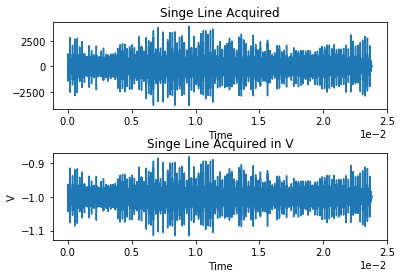

In [12]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

f = open('LabRFdata.bin','rb')   
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() 
#We take step size as 22 Mhz as the when we take 125MHz it cannot give a clear picture also we cannot take below 15 MHZ 
#as it gives error in the further file processing
x=np.arange(0,L/22e6,1/22e6)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

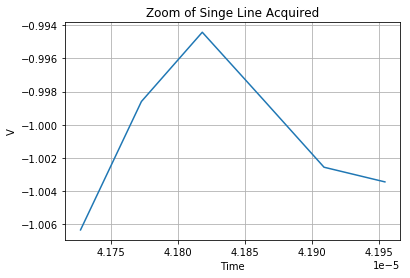

In [13]:
#Taken From the file Ultrasound Assignment 
inx1=np.where(x>0.4170e-4)
inx1=inx1[0]
inx2=np.where(x>0.420e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.grid()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Since 1 cycles of the signal are between  0.4180×10−40.4180×10−4  and  0.4200×−40.4200×−4  we then have a frequency of  1(0.4200×10−4−0.4180×10−4)/1=5MHz1(0.4200×10−4−0.4180×10−4)/1=5MHz 
We will now obtain this using DFT. Note: just as we did before, we will take away the dc component!

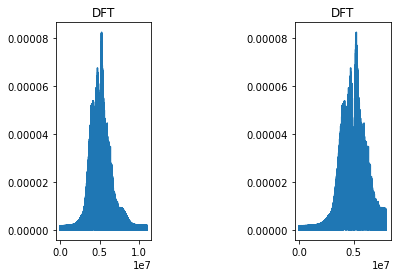

In [14]:
#Eliminating dc
LineF-=np.mean(LineF)

f=np.arange(0,22e6/2,22e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

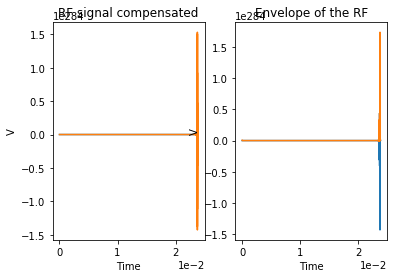

In [16]:
#Same as ultrasound file from class
#Compensating
h=x*1450
#We change the frequency
ffatt=np.exp(4*4.78*h)
LineC=LineF*ffatt
#Plotting
plt.subplot(121)
plt.plot(x,LineF[:L])
plt.title('Before compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineC[:L])
plt.title('After compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Hilbert Transform
LineE=hilbert(LineC)
LineE=abs(LineE)

plt.subplot(121)
plt.plot(x,LineC[:L])
plt.title('RF signal compensated')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineE[:L])
plt.title('Envelope of the RF')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

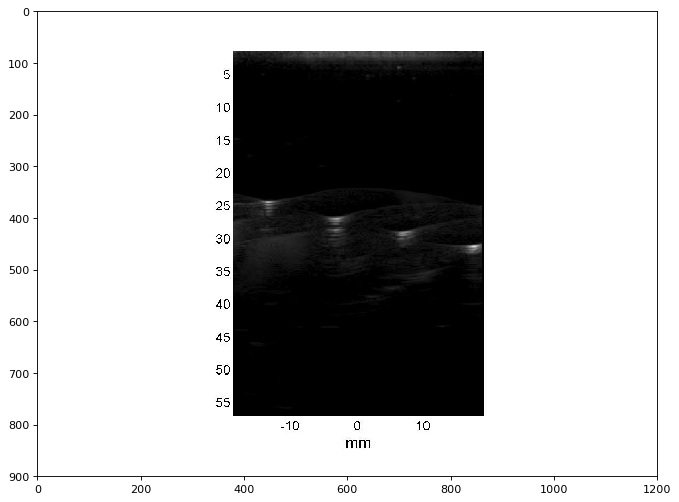

In [23]:
#Now to show image we import the image file and 

from skimage import novice, data, io, exposure
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
img = novice.open('picture.jpg')
ima= mpimg.imread('picture.jpg','True') 
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(ima)
plt.show()

In [18]:
#Question No 5
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')
# Let's print all the Metadata here
print(RefDs)


(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

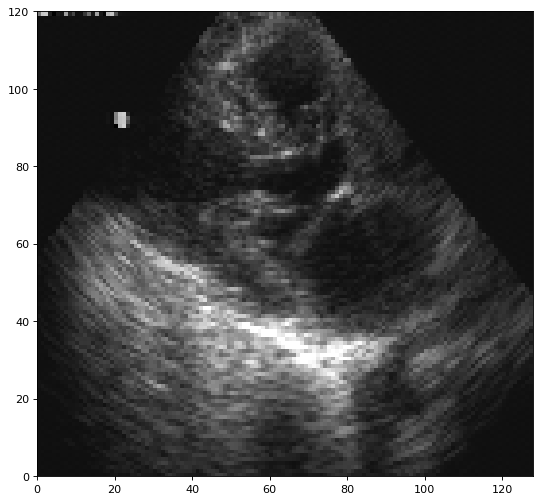

In [19]:
import matplotlib.pyplot as plt
ConstPixelDims = (int(RefDs.NumberofFrames), int(RefDs.Rows), int(RefDs.Columns) )
ArrayDicom = np.zeros(ConstPixelDims,dtype=RefDs.pixel_array.dtype)
#Reading the file 
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
#As this is three dimension image we need x,y,z plane so we add an : 
ArrayDicom[:,:,:]=ds.pixel_array

fig=plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale


plt.pcolormesh(np.flipud(ArrayDicom[7,:,:]))